In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# Directorios
base_dir = "A:/Escuela/Octavos_Semestre/M2_IA/Act_2.1/new__/"
test_dir = os.path.join(base_dir, "A:/Escuela/Octavos_Semestre/M2_IA/Act_2.1/new__/_test")
train_dir = os.path.join(base_dir, "A:/Escuela/Octavos_Semestre/M2_IA/Act_2.1/new__/_train")

# Generación de datos de prueba
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode="categorical",
    shuffle=False
)

train_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode="categorical",
    shuffle=False
)

# Cargar el modelo entrenado
model = load_model("__model_best_new_2.keras")

Found 957 images belonging to 16 classes.
Found 4465 images belonging to 16 classes.


# Matriz de Confusión de Test

C:\Users\alex_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step


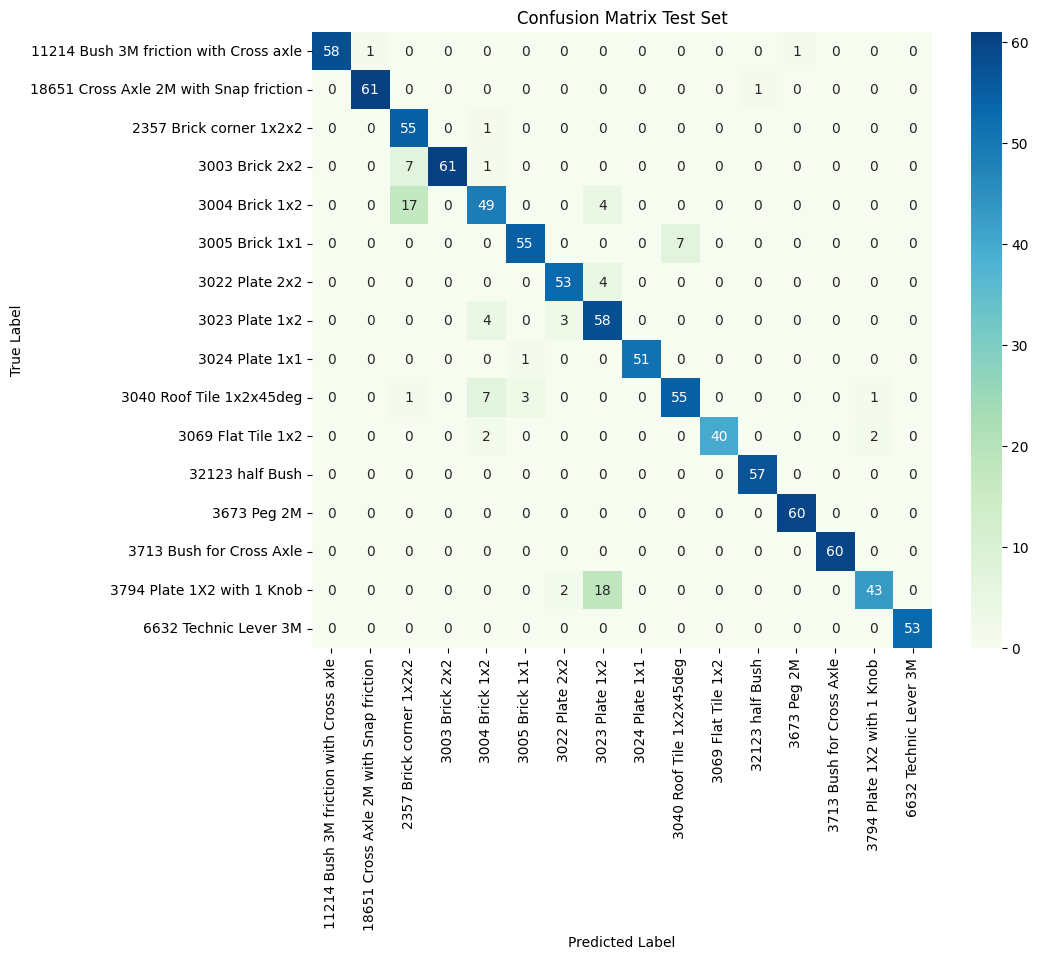

Classification Report:
                                        precision    recall  f1-score   support

11214 Bush 3M friction with Cross axle       1.00      0.97      0.98        60
18651 Cross Axle 2M with Snap friction       0.98      0.98      0.98        62
               2357 Brick corner 1x2x2       0.69      0.98      0.81        56
                        3003 Brick 2x2       1.00      0.88      0.94        69
                        3004 Brick 1x2       0.77      0.70      0.73        70
                        3005 Brick 1x1       0.93      0.89      0.91        62
                        3022 Plate 2x2       0.91      0.93      0.92        57
                        3023 Plate 1x2       0.69      0.89      0.78        65
                        3024 Plate 1x1       1.00      0.98      0.99        52
              3040 Roof Tile 1x2x45deg       0.89      0.82      0.85        67
                    3069 Flat Tile 1x2       1.00      0.91      0.95        44
                

In [ ]:
# Evaluación del modelo
predictions = model.predict(test_generator) # Probabilidades de las clases
y_true = test_generator.classes
y_pred = np.argmax(predictions, axis=1)

# Matriz de confusión
conf_matrix_test = confusion_matrix(y_true, y_pred)

# Informe de clasificación
class_names_test = sorted(test_generator.class_indices.keys())
class_report_test = classification_report(y_true, y_pred, target_names=class_names_test)

# Visualización de la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="GnBu", xticklabels=class_names_test, yticklabels=class_names_test)
plt.title("Confusion Matrix Test Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Classification Report:")
print(class_report_test)

C:\Users\alex_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


70/70 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step


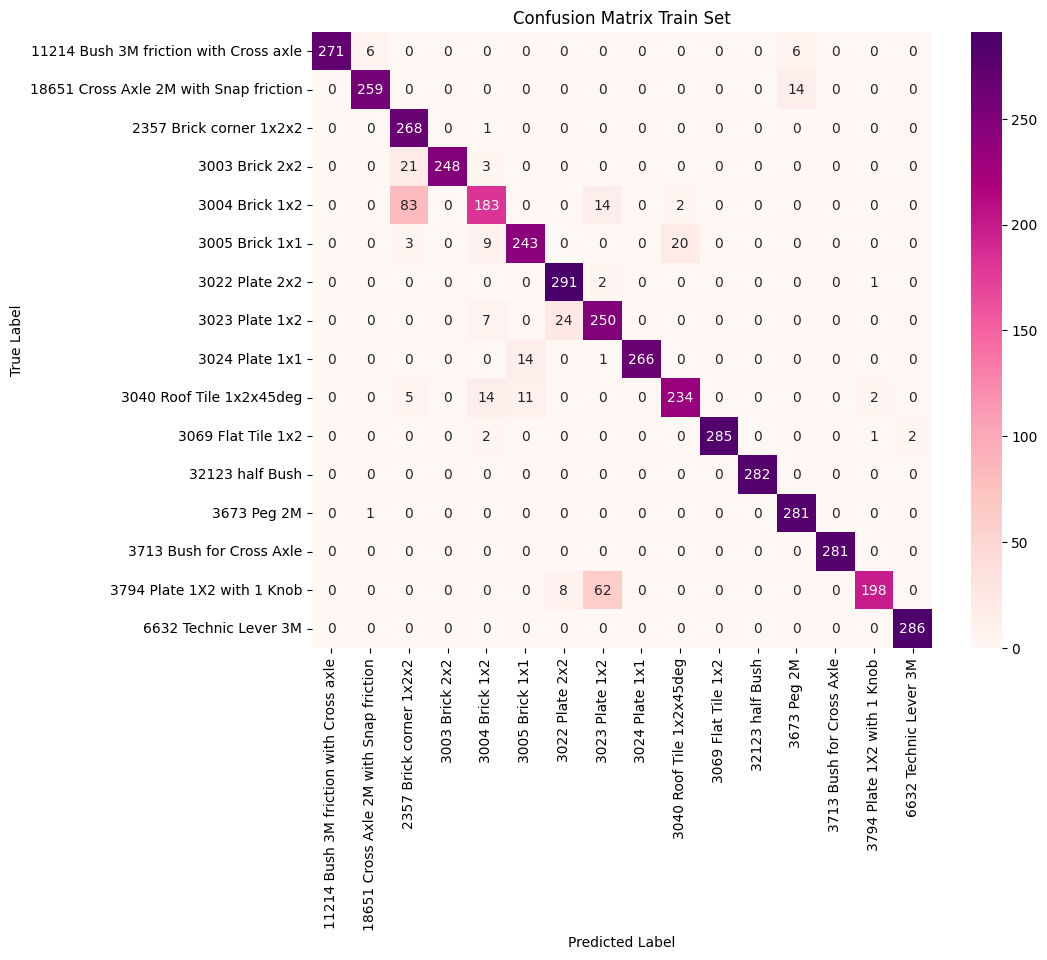

Classification Report:
                                        precision    recall  f1-score   support

11214 Bush 3M friction with Cross axle       1.00      0.96      0.98       283
18651 Cross Axle 2M with Snap friction       0.97      0.95      0.96       273
               2357 Brick corner 1x2x2       0.71      1.00      0.83       269
                        3003 Brick 2x2       1.00      0.91      0.95       272
                        3004 Brick 1x2       0.84      0.65      0.73       282
                        3005 Brick 1x1       0.91      0.88      0.90       275
                        3022 Plate 2x2       0.90      0.99      0.94       294
                        3023 Plate 1x2       0.76      0.89      0.82       281
                        3024 Plate 1x1       1.00      0.95      0.97       281
              3040 Roof Tile 1x2x45deg       0.91      0.88      0.90       266
                    3069 Flat Tile 1x2       1.00      0.98      0.99       290
                

In [ ]:
# Evaluación del modelo
predictions = model.predict(train_generator) # Probabilidades de las clases
y_true = train_generator.classes
y_pred = np.argmax(predictions, axis=1)

# Matriz de confusión
conf_matrix_train = confusion_matrix(y_true, y_pred)

# Informe de clasificación
class_names_train = sorted(train_generator.class_indices.keys())
class_report_train = classification_report(y_true, y_pred, target_names=class_names_train)

# Visualización de la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="RdPu", xticklabels=class_names_train, yticklabels=class_names_train)
plt.title("Confusion Matrix Train Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Classification Report:")
print(class_report_train)

In [ ]:
# Obtén las primeras 9 imágenes y etiquetas del generador de pruebas
images, labels = next(test_generator)

# Haz predicciones para estas imágenes
predictions = model.predict(images)

# Convierte las predicciones a clases
predicted_classes = np.argmax(predictions, axis=1)

# Convierte las etiquetas verdaderas a clases
true_classes = np.argmax(labels, axis=1)

# Imprime las primeras 9 predicciones y las etiquetas verdaderas
for i in range(64):
    print(f"Image {i+1}:")  # Podemos cambiar el rango para ver más imágenes
    print(f"Predicted class:\t {class_names_test[predicted_classes[i]]}")
    print(f"True class:\t {class_names_test[true_classes[i]]}")
    print()

2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 389ms/step
Image 1:
Predicted class:	 11214 Bush 3M friction with Cross axle
True class:	 11214 Bush 3M friction with Cross axle

Image 2:
Predicted class:	 11214 Bush 3M friction with Cross axle
True class:	 11214 Bush 3M friction with Cross axle

Image 3:
Predicted class:	 11214 Bush 3M friction with Cross axle
True class:	 11214 Bush 3M friction with Cross axle

Image 4:
Predicted class:	 11214 Bush 3M friction with Cross axle
True class:	 11214 Bush 3M friction with Cross axle

Image 5:
Predicted class:	 18651 Cross Axle 2M with Snap friction
True class:	 11214 Bush 3M friction with Cross axle

Image 6:
Predicted class:	 11214 Bush 3M friction with Cross axle
True class:	 11214 Bush 3M friction with Cross axle

Image 7:
Predicted class:	 11214 Bush 3M friction with Cross axle
True class:	 11214 Bush 3M friction with Cross axle

Image 8:
Predicted class:	 11214 Bush 3M friction with Cross axle
True class:	 11214 Bush 3M friction with Cross axle

Image 9:


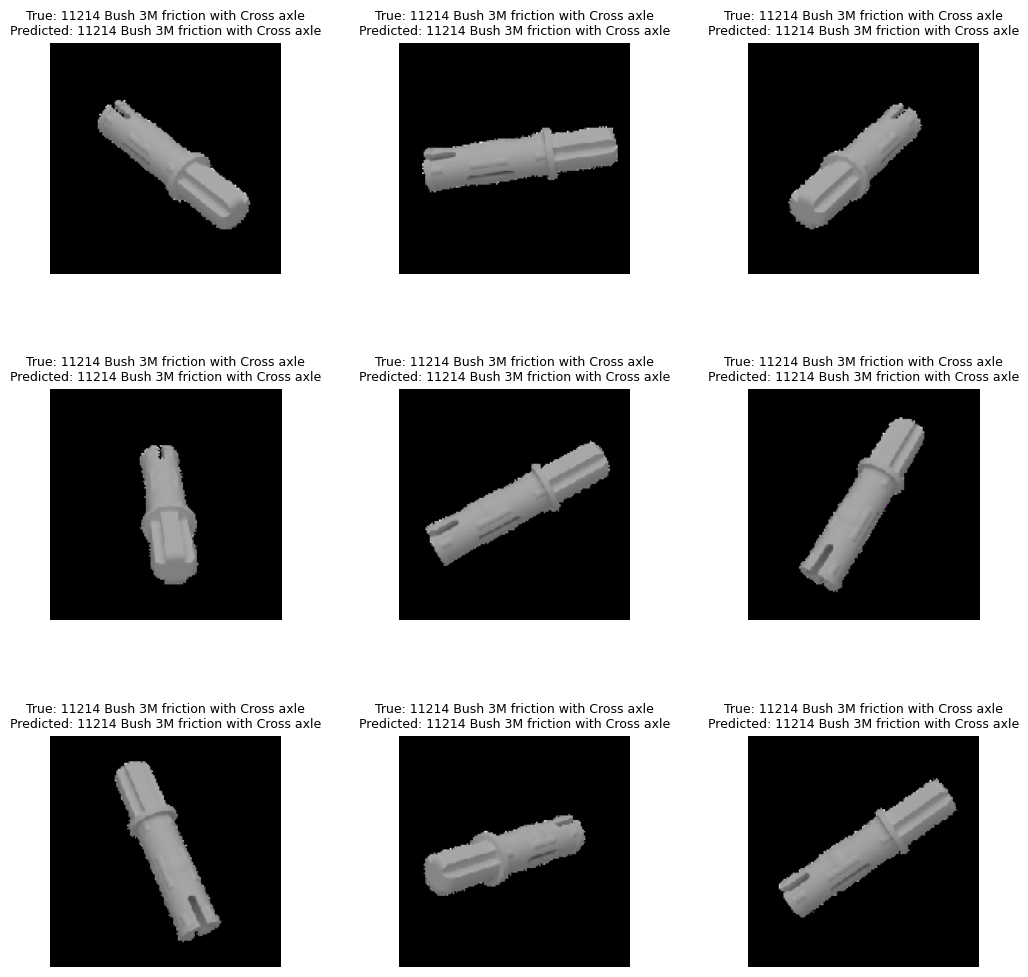

Classification Report:
                                        precision    recall  f1-score   support

11214 Bush 3M friction with Cross axle       1.00      0.97      0.98        60
18651 Cross Axle 2M with Snap friction       0.98      0.98      0.98        62
               2357 Brick corner 1x2x2       0.69      0.98      0.81        56
                        3003 Brick 2x2       1.00      0.88      0.94        69
                        3004 Brick 1x2       0.77      0.70      0.73        70
                        3005 Brick 1x1       0.93      0.89      0.91        62
                        3022 Plate 2x2       0.91      0.93      0.92        57
                        3023 Plate 1x2       0.69      0.89      0.78        65
                        3024 Plate 1x1       1.00      0.98      0.99        52
              3040 Roof Tile 1x2x45deg       0.89      0.82      0.85        67
                    3069 Flat Tile 1x2       1.00      0.91      0.95        44
                

In [ ]:
# Visualizamos algunas imágenes con sus predicciones
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i +1])
    plt.title(f"True: {class_names_test[true_classes[i + 10]]}\nPredicted: {class_names_test[predicted_classes[i + 10]]}", fontsize=9)
    plt.axis('off')
    
plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Para ajustar el espacio entre las imágenes
plt.show()
    
print("Classification Report:")
print(class_report_test)